In [155]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [156]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [157]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc
from sqlalchemy import inspect

In [158]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [159]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [160]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [161]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [162]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [163]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

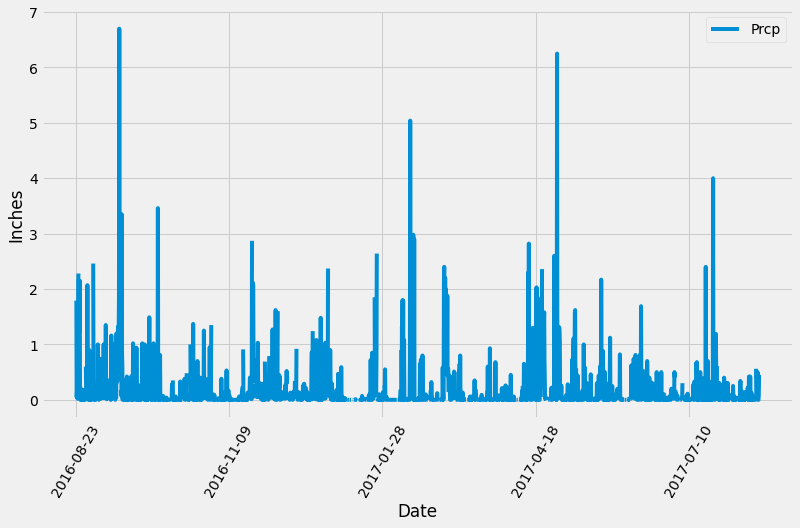

In [175]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
query_date = most_recent - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data_table = session.query(measurement.date, measurement.prcp).filter(measurement.date >= query_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
data_frame = pd.DataFrame(data_table,columns = ['Date', 'Prcp'])
data_frame.set_index('Date')

# Sort the dataframe by date
data_frame.sort_values('Date', inplace = True)
data_frame.dropna
data_frame.head()

# Use Pandas Plotting with Matplotlib to plot the data
data_frame.plot(x = 'Date', y = 'Prcp', rot = 60, figsize=(12,7))
plt.ylabel('Inches')
plt.show()



In [165]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data_frame.describe()

,Prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [166]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(station.station).count()
total_stations

9

In [167]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stns_rankings = session.query(measurement.station, func.count(measurement.station)).\
order_by(func.count(measurement.station).desc()).\
group_by(measurement.station).all()

print(active_stns_rankings)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [168]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_stn = active_stns_rankings[0]
most_active_stn

lowest_temp = session.query(func.min(measurement.tobs)).\
filter(measurement.station == most_active_stn[0]).all()
print(lowest_temp)

highest_temp = session.query(func.max(measurement.tobs)).\
filter(measurement.station == most_active_stn[0]).all()
print(highest_temp)

avg_temp = session.query(func.avg(measurement.tobs)).\
filter(measurement.station == most_active_stn[0]).all()
print(avg_temp)

[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


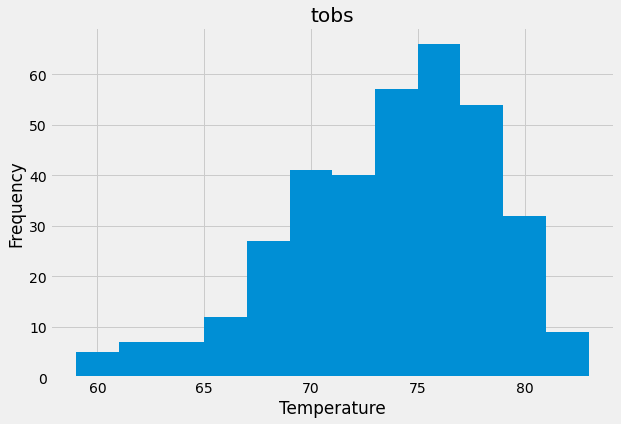

In [169]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Getting the data for last year and converting it to a dataframe
recent_date_active = session.query(measurement.date).filter(measurement.station == most_active_stn[0]).order_by(measurement.date.desc()).first()
most_recent_date = dt.date(2017, 8, 18)
first_date = most_recent_date - dt.timedelta(days=365)
last_year_data = session.query(measurement.date,measurement.tobs).filter(measurement.station == most_active_stn[0]).\
filter(measurement.date >= first_date).all()
last_year_df = pd.DataFrame(last_year_data)
last_year_df

# Ploting histogram
last_year_df.hist(bins = 12, alpha = 1, figsize=(9,6))
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Close session

In [ ]:
# Close Session
session.close()